In [4]:
!pip install mutagen

In [5]:
import os
import numpy as np
import pandas as pd
import librosa as lb
import librosa.display
import matplotlib.pyplot as plt 

In [7]:
DRIVE_PATH = './psychiatric_disorders_data.ML'
SEED = 42

## **Data preparation**

In [8]:
# participants_info
participants = pd.read_excel(
    os.path.join(DRIVE_PATH, 'PsychiatricDiscourse_participant.data.xlsx')
)

In [9]:
participants.columns

Index(['ID', 'group', 'diagnosis', 'sex', 'age', 'education.level',
       'education.years', 'depression.symptoms', 'thought.disorder.symptoms'],
      dtype='object')

In [10]:
participants

ID    group                        diagnosis     sex   age  \
0    PD-001  patient             schizotypal.disorder  female  19.0   
1    PD-002  patient       bipolar.affective.disorder  female  26.0   
2    PD-003  patient             schizotypal.disorder  female  17.0   
3    PD-004  patient  borderline.personality.disorder  female  16.0   
4    PD-005  patient             schizotypal.disorder  female  19.0   
..      ...      ...                              ...     ...   ...   
268  PN-319  control                              NaN  female  27.0   
269  PN-320  control                              NaN  female  27.0   
270  PN-321  control                              NaN    male  26.0   
271  PN-322  control                              NaN  female  41.0   
272  PN-324  control                              NaN  female  26.0   

    education.level  education.years  depression.symptoms  \
0         secondary               11                    1   
1            higher               17                    1   
2         secondary               10                    0   
3         secondary                9                    1   
4         secondary               11                    0   
..              ...              ...                  ...   
268          higher               19                    1   
269          higher               18                    3   
270          higher               17                    1   
271      vocational               13                    0   
272          higher               15                    0   

     thought.disorder.symptoms  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0  
..                         ...  
268                          0  
269                          0  
270                          0  
271                          0  
272                          0  

[273 rows x 9 columns]

In [11]:
# depression_only
depression_only = participants.loc[
    (participants['thought.disorder.symptoms'] == 0.) &
    (participants['depression.symptoms'] != 0.)

]
depression_only

ID    group                        diagnosis     sex   age  \
0    PD-001  patient             schizotypal.disorder  female  19.0   
1    PD-002  patient       bipolar.affective.disorder  female  26.0   
3    PD-004  patient  borderline.personality.disorder  female  16.0   
7    PD-008  patient       bipolar.affective.disorder  female  19.0   
12   PD-013  patient    recurrent.depressive.disorder  female  20.0   
..      ...      ...                              ...     ...   ...   
262  PN-313  control                              NaN  female  28.0   
265  PN-316  control                              NaN  female  30.0   
268  PN-319  control                              NaN  female  27.0   
269  PN-320  control                              NaN  female  27.0   
270  PN-321  control                              NaN    male  26.0   

       education.level  education.years  depression.symptoms  \
0            secondary               11                    1   
1               higher               17                    1   
3            secondary                9                    1   
7    higher.unfinished               12                    1   
12   higher.unfinished               12                    1   
..                 ...              ...                  ...   
262             higher               17                    2   
265             higher               16                    2   
268             higher               19                    1   
269             higher               18                    3   
270             higher               17                    1   

     thought.disorder.symptoms  
0                            0  
1                            0  
3                            0  
7                            0  
12                           0  
..                         ...  
262                          0  
265                          0  
268                          0  
269                          0  
270                          0  

[93 rows x 9 columns]

In [12]:
depression_only.loc[depression_only['thought.disorder.symptoms'] != 0.]

Empty DataFrame
Columns: [ID, group, diagnosis, sex, age, education.level, education.years, depression.symptoms, thought.disorder.symptoms]
Index: []

In [13]:
control_group = participants.loc[
    (participants['depression.symptoms'] == 0.) &
    (participants['thought.disorder.symptoms'] == 0.)
]

control_group

ID    group                        diagnosis     sex   age  \
2    PD-003  patient             schizotypal.disorder  female  17.0   
4    PD-005  patient             schizotypal.disorder  female  19.0   
5    PD-006  patient  borderline.personality.disorder  female  22.0   
8    PD-009  patient             schizotypal.disorder  female  17.0   
9    PD-010  patient       bipolar.affective.disorder  female  20.0   
..      ...      ...                              ...     ...   ...   
264  PN-315  control                              NaN  female  37.0   
266  PN-317  control                              NaN    male  34.0   
267  PN-318  control                              NaN  female  31.0   
271  PN-322  control                              NaN  female  41.0   
272  PN-324  control                              NaN  female  26.0   

       education.level  education.years  depression.symptoms  \
2            secondary               10                    0   
4            secondary               11                    0   
5    higher.unfinished               15                    0   
8            secondary               10                    0   
9    higher.unfinished               12                    0   
..                 ...              ...                  ...   
264     ученая степень               17                    0   
266     ученая степень               18                    0   
267             higher               15                    0   
271         vocational               13                    0   
272             higher               15                    0   

     thought.disorder.symptoms  
2                            0  
4                            0  
5                            0  
8                            0  
9                            0  
..                         ...  
264                          0  
266                          0  
267                          0  
271                          0  
272                          0  

[150 rows x 9 columns]

## **Transformation example**

Below I illustrate the process of feature extraction for a single recording.

In [14]:
signal, sr = lb.load(os.path.join(DRIVE_PATH, 'wav files/PN-004-pers-1-present.wav'))

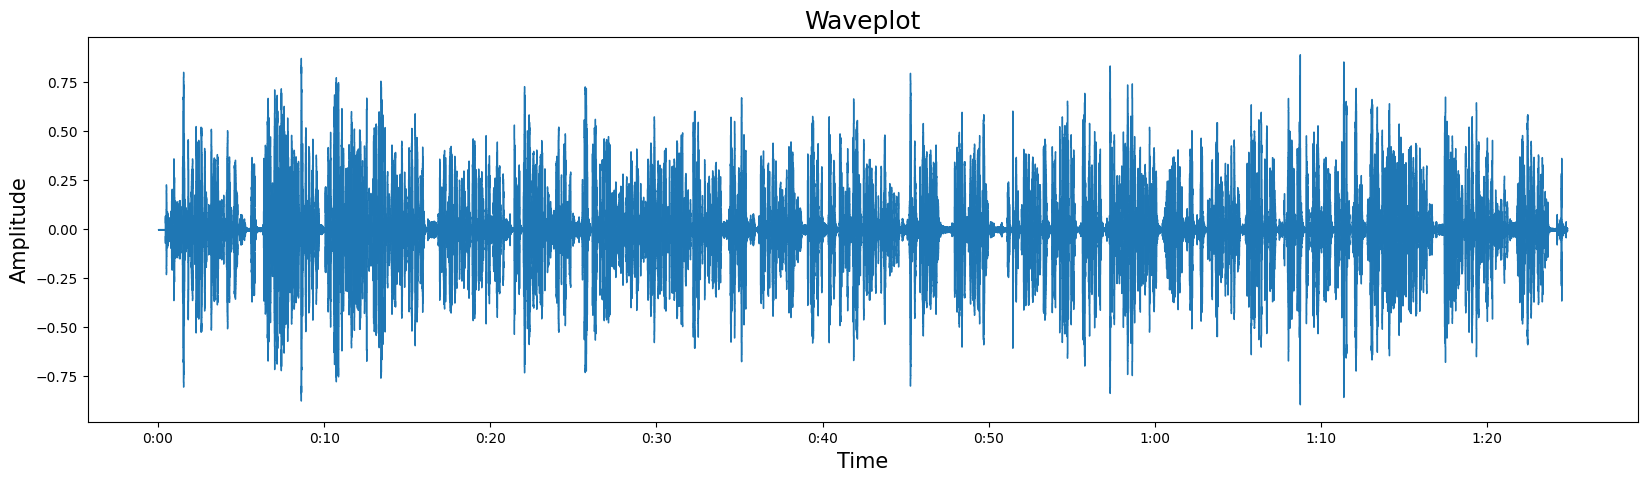

In [15]:
plt.figure(figsize=(20, 5))
librosa.display.waveshow(signal, sr=sr)
plt.title('Waveplot', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Amplitude', fontdict=dict(size=15))
plt.show()

In [16]:
import IPython.display as ipd
ipd.Audio(signal, rate=sr)

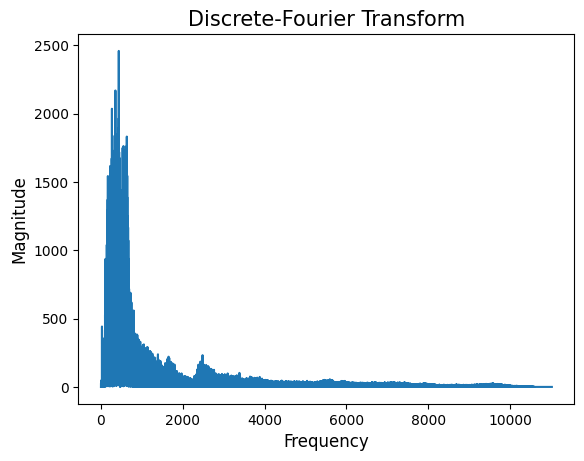

In [17]:
# Creating a Discrete-Fourier Transform with our FFT algorithm
fast_fourier_transf = np.fft.fft(signal)

# Magnitudes indicate the contribution of each frequency
magnitude = np.abs(fast_fourier_transf)

# mapping the magnitude to the relative frequency bins
frequency = np.linspace(0, sr, len(magnitude))

# We only need the first half of the magnitude and frequency
left_mag = magnitude[:int(len(magnitude)/2)]
left_freq = frequency[:int(len(frequency)/2)]


plt.plot(left_freq, left_mag)
plt.title('Discrete-Fourier Transform', fontdict=dict(size=15))
plt.xlabel('Frequency', fontdict=dict(size=12))
plt.ylabel('Magnitude', fontdict=dict(size=12))
plt.show()

Unscaled spectrogram

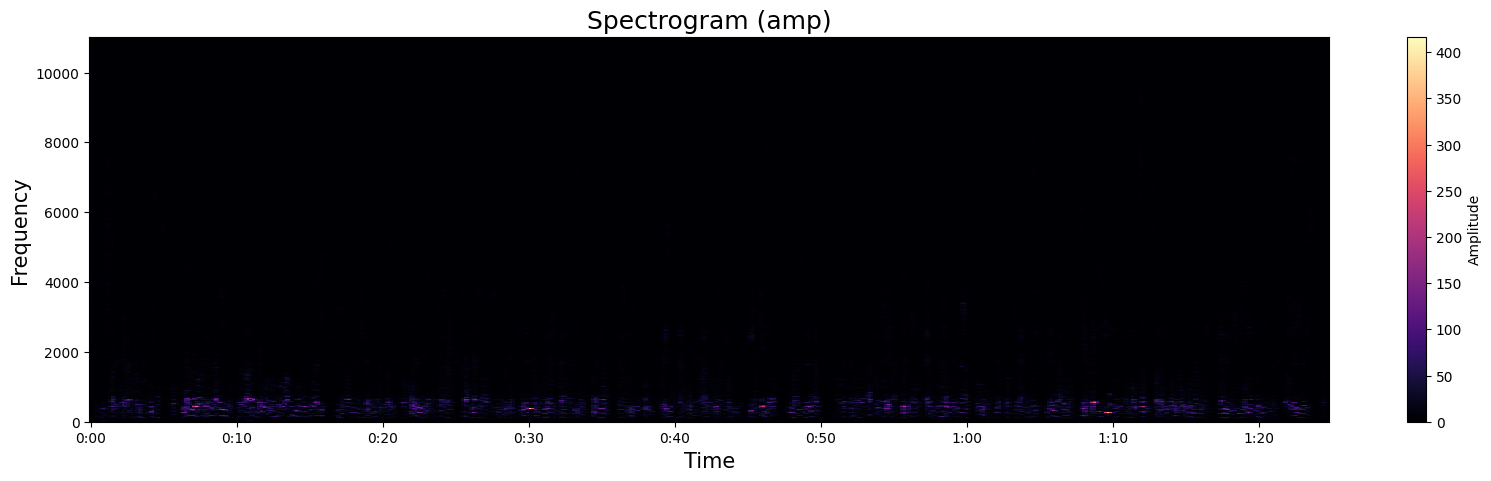

In [18]:
# this is the number of samples in a window per fft
n_fft = 16384 

# The amount of samples we are shifting after each fft
hop_length = 4096

# Short-time Fourier Transformation on our audio data
audio_stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)

# gathering the absolute values for all values in our audio_stft
spectrogram = np.abs(audio_stft)

# Plotting the short-time Fourier Transformation
plt.figure(figsize=(20, 5))

# Using librosa.display.specshow() to create our spectrogram
librosa.display.specshow(
    spectrogram, sr=sr, x_axis='time',
    y_axis='hz', hop_length=hop_length
)

plt.colorbar(label='Amplitude')
plt.title('Spectrogram (amp)', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Frequency', fontdict=dict(size=15))
plt.show()

Amplitude is barely distinguishable, so we convert it ot a different, decible scale (more or less logarithmic)

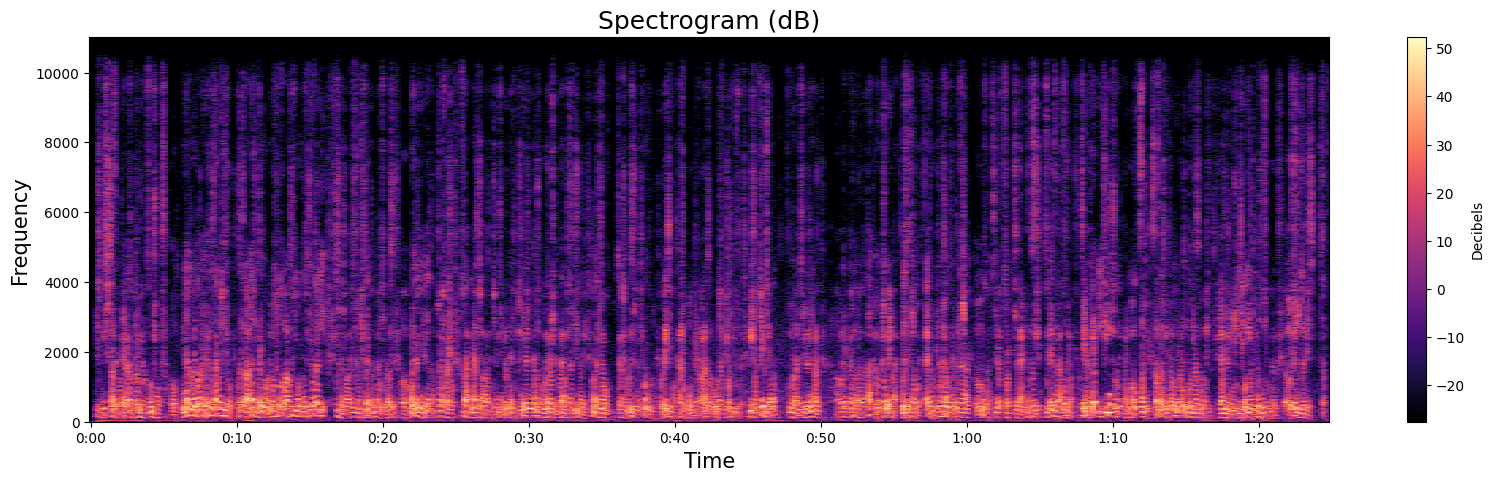

In [19]:
# Short-time Fourier Transformation on our audio data
audio_stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)

# gathering the absolute values for all values in our audio_stft 
spectrogram = np.abs(audio_stft)

# Converting the amplitude to decibels
log_spectro = librosa.amplitude_to_db(spectrogram)

# Plotting the short-time Fourier Transformation
plt.figure(figsize=(20, 5))

# Using librosa.display.specshow() to create our spectrogram
librosa.display.specshow(
    log_spectro, sr=sr,
    x_axis='time', y_axis='hz',
    hop_length=hop_length, cmap='magma'
)

plt.colorbar(label='Decibels')
plt.title('Spectrogram (dB)', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Frequency', fontdict=dict(size=15))
plt.show()


This is better, but we can do even more by converting to frequencies to Mel scale, which roughly represents the frequency difference, which would be audible by human ear.

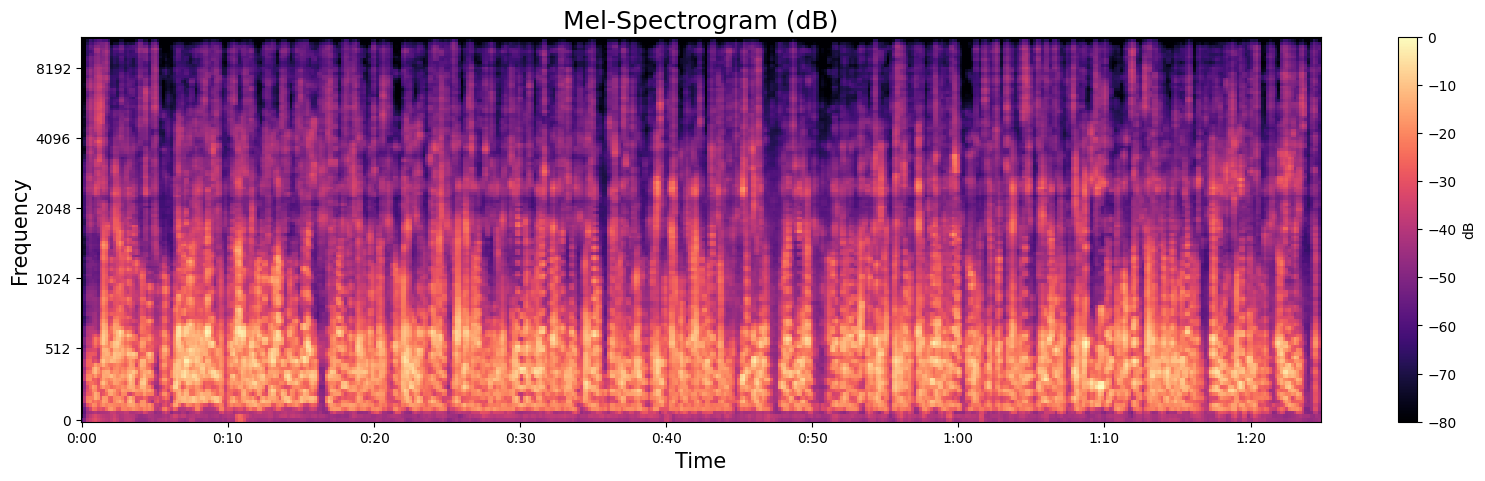

In [20]:
mel_signal = librosa.feature.melspectrogram(
    y=signal, sr=sr, hop_length=hop_length, n_fft=n_fft
)

spectrogram = np.abs(mel_signal)
power_to_db = librosa.power_to_db(spectrogram, ref=np.max)

plt.figure(figsize=(20, 5))
librosa.display.specshow(
    power_to_db, sr=sr, x_axis='time',
    y_axis='mel', cmap='magma',
    hop_length=hop_length
)

plt.colorbar(label='dB')
plt.title('Mel-Spectrogram (dB)', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Frequency', fontdict=dict(size=15))
plt.show()

There are other features we can possibly extract from the recording. Below is the chromogram, which extracts the pitch classes from the audio, hence is best for music classification. We will not use it.

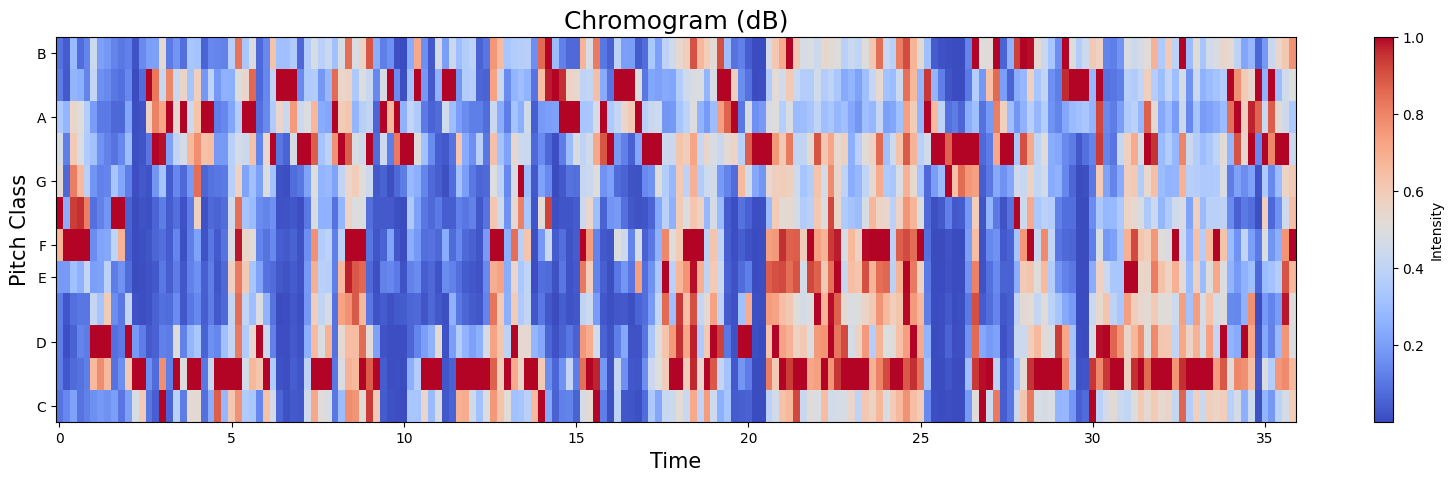

In [146]:
chromo_signal = librosa.feature.chroma_stft(
    y=signal, sr=sr, hop_length=hop_length, n_fft=n_fft
)

power_to_db = librosa.power_to_db(chromo_signal, ref=np.max)

plt.figure(figsize=(20, 5))
librosa.display.specshow(
    chromo_signal, sr=sr, x_axis='time',
    y_axis='chroma', cmap='coolwarm',
    hop_length=hop_length
)

plt.colorbar(label='Intensity')
plt.title('Chromogram (dB)', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Pitch Class', fontdict=dict(size=15))
plt.show()

Also one can extract so-called MFCCs (Mel Frequency Cepestral Coefficients). For now we omit them, since the scope of our research is comparison of method performance on spectrograms directly.

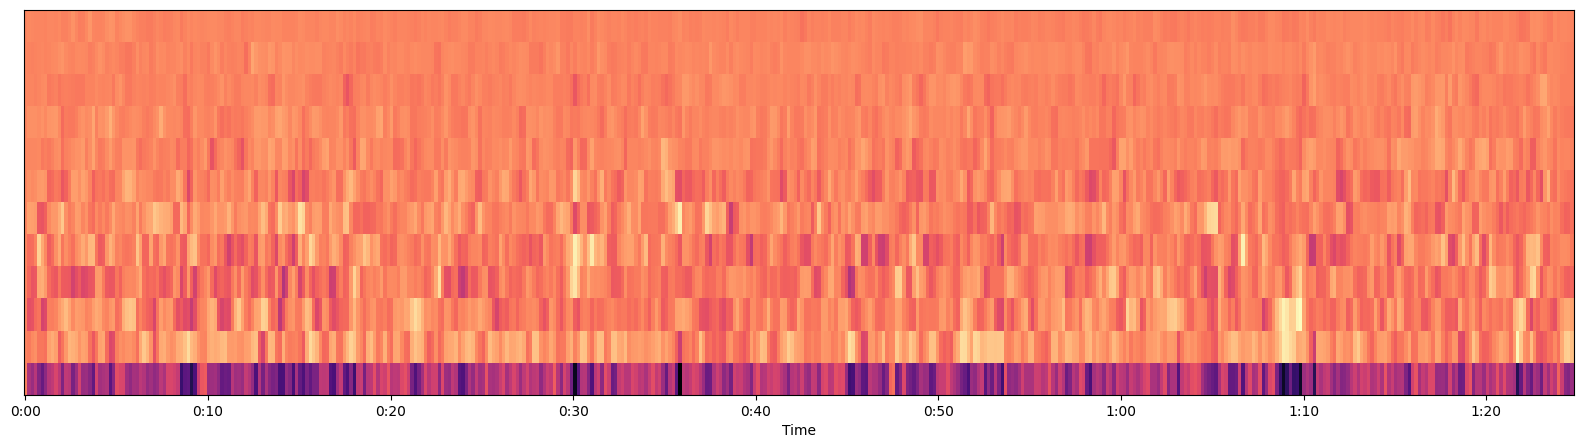

In [22]:
mfcc = librosa.feature.mfcc(
    S=power_to_db,
)

plt.figure(figsize=(20, 5))
librosa.display.specshow(
    mfcc, 
    sr=sr,
    x_axis='time', 
    cmap='magma',
    hop_length=hop_length
)
plt.show()

## **Data processing**

1) dataframe with patient ids, sex, age, education years

2) exclude patients which have < 3 recordings

3) each recording to a feature set with mel coefficients, pad with zeroes/cut

For each patient I will process his three recordings as descirbed above

In [24]:
df = pd.concat([depression_only, control_group])

df.drop(['education.level', 'diagnosis', 'thought.disorder.symptoms', 'group'], axis=1, inplace=True)
df.sex.replace(['female', 'male'], [0, 1], inplace=True)
df.age.fillna(df.age.mean(), inplace=True)
df.age = df.age.astype('int64')

In [26]:
def get_patient_audio(row, data_folder=os.path.join(DRIVE_PATH, 'wav files'), return_uncomplete=False):
    """
    Find patient's recordings
    """
    key = row.ID
    audio_files = []
    for filename in os.listdir(data_folder):
        if filename.find(key) != -1:
            audio_files.append(filename)
    return audio_files

df['audio'] = df.apply(get_patient_audio, axis=1)

# exclude patients with no recordings
df = df[df.audio.apply(len) == 3]

In [29]:
df.sample(5)

ID  sex  age  education.years  depression.symptoms  \
180  PN-055    0   22               15                    0   
220  PN-231    0   34               15                    0   
143  PN-008    0   20               13                    0   
172  PN-043    0   35               16                    1   
215  PN-226    0   51               15                    0   

                                                 audio  
180  [PN-055-pers-1-party.wav, PN-055-instr-1-chair...  
220  [PN-231-pers-1-trip.wav, PN-231-pic-1-winterda...  
143  [PN-008-instr-1-chair.wav, PN-008-pers-1-prese...  
172  [PN-043-pic-1-sportsman.wav, PN-043-instr-1-ta...  
215  [PN-226-instr-1-chair.wav, PN-226-pic-1-winter...

In [30]:
df.shape

(135, 6)

In [32]:
# Group recordings by domain

task_mapping = {
    'narrative': ['sportsman', 'adventure', 'winterday'], 
    'story': ['present', 'trip', 'party'], 
    'instruction': ['chair', 'table', 'bench']
}

def get_domain_audio(row, domain):
    files = []
    for topic in task_mapping[domain]:
        for file_name in row.audio:
            if file_name.find(topic) != -1:
                files.append(file_name)
                
    assert len(files) < 2
    return files[0] if len(files) else None
    
    
    
for domain in task_mapping:
    df[f'audio.{domain}'] = df.apply(get_domain_audio, axis=1, domain=domain)

In [33]:
df.sample(5)

ID  sex  age  education.years  depression.symptoms  \
178  PN-052    0   39               18                    2   
259  PN-310    0   20               14                    0   
215  PN-226    0   51               15                    0   
185  PN-069    1   21               15                    3   
203  PN-214    1   20               14                    0   

                                                 audio  \
178  [PN-052-instr-1-table.wav, PN-052-pic-1-advent...   
259  [PN-310-pers-1-party.wav, PN-310-pic-1-sportsm...   
215  [PN-226-instr-1-chair.wav, PN-226-pic-1-winter...   
185  [PN-069-instr-1-chair.wav, PN-069-pers-1-party...   
203  [PN-214-pic-1-winterday.wav, PN-214-instr-1-ch...   

                audio.narrative              audio.story  \
178  PN-052-pic-1-adventure.wav   PN-052-pers-1-trip.wav   
259  PN-310-pic-1-sportsman.wav  PN-310-pers-1-party.wav   
215  PN-226-pic-1-winterday.wav   PN-226-pers-1-trip.wav   
185  PN-069-pic-1-winterday.wav  PN-069-pers-1-party.wav   
203  PN-214-pic-1-winterday.wav  PN-214-pers-1-party.wav   

            audio.instruction  
178  PN-052-instr-1-table.wav  
259  PN-310-instr-1-bench.wav  
215  PN-226-instr-1-chair.wav  
185  PN-069-instr-1-chair.wav  
203  PN-214-instr-1-chair.wav

Observe recording lengths

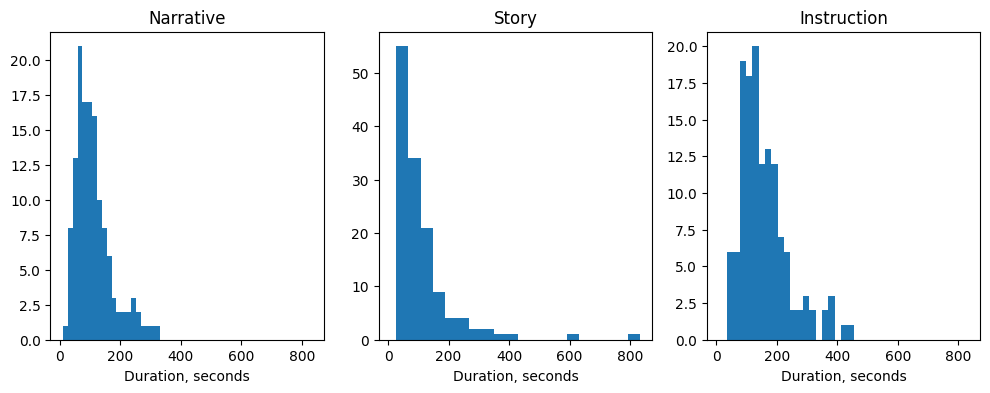

In [34]:
import mutagen
from mutagen.wave import WAVE

def recording_lengths_plot(files, ax, title=None, data_folder=os.path.join(DRIVE_PATH, 'wav files')):
    """
    Plot recordings length barchart
    """
    lengths = []
    for _, filename in files.items():
        if filename is not None:
            audio = WAVE(os.path.join(data_folder, filename))
            lengths.append(int(audio.info.length))
        
    ax.hist(lengths, bins=20)
    if title:
        ax.set_title(title)
    ax.set_xlabel('Duration, seconds')


fig, ax = plt.subplots(1, 3, sharex=True, figsize=(12, 4))    
recording_lengths_plot(df['audio.narrative'], ax[0], title='Narrative')
recording_lengths_plot(df['audio.story'], ax[1], title='Story')
recording_lengths_plot(df['audio.instruction'], ax[2], title='Instruction')
plt.show()

In [40]:
from tqdm import tqdm


def get_cutoff_duration(files, data_folder):
    """
    Find cutoff qunatile for long recordings
    """
    lengths = []
    for _, filename in files.items():
        if filename is not None:
            audio = WAVE(os.path.join(data_folder, filename))
            lengths.append(int(audio.info.length))
    lengths = np.asarray(lengths)
    duration_limit = np.quantile(lengths, [0.9])
    return duration_limit


def get_spectrogram_coeffs(files, data_folder, duration):
    """
    Dervive coefficients for recordings column
    """
    for _, filename in tqdm(files.items(), total=len(files)):
        signal, sr = lb.load(os.path.join(data_folder, filename), sr=12000)

        # this is the number of samples in a window per fft
        n_fft = int(sr * 0.3) # 30 ms

        # The amount of samples we are shifting after each fft
        hop_length = int(n_fft / 2)

        mel_signal = librosa.feature.melspectrogram(
            y=signal, sr=sr, hop_length=hop_length, n_fft=n_fft, n_mels=48
        )

        spectrogram = np.abs(mel_signal)
        power_to_db = librosa.power_to_db(spectrogram, ref=np.max)
        
        # pad with zeroes or cut
        pad2d = lambda a, i: a[:, 0: i] if a.shape[1] > i else np.hstack((a, np.full((a.shape[0], i - a.shape[1]), -80.0)))
        power_to_db = pad2d(power_to_db, i=int(duration * sr / hop_length))
        
        # unroll spectrogram
        coeffs_arr = power_to_db.reshape(-1)
        yield coeffs_arr
    

def process_recordings(files, data_folder=os.path.join(DRIVE_PATH, 'wav files')):
    """
    Create new dataframe with coefficients for a given column
    """
    duration = get_cutoff_duration(files, data_folder)
    coeffs_gen = get_spectrogram_coeffs(files, data_folder, duration)
    return pd.DataFrame(coeffs_gen)

In [41]:
narr_coeffs = process_recordings(df['audio.narrative']).add_prefix('narr_')

100%|█████████████████████████████████████████| 135/135 [05:36<00:00,  2.49s/it]


In [42]:
story_coeffs = process_recordings(df['audio.story']).add_prefix('story_')

100%|█████████████████████████████████████████| 135/135 [05:35<00:00,  2.48s/it]


In [43]:
inst_coeffs = process_recordings(df['audio.instruction']).add_prefix('inst_')

100%|█████████████████████████████████████████| 135/135 [08:49<00:00,  3.92s/it]


In [148]:
narr_coeffs.shape

(135, 62064)

Create dataframe with all features. Shift them by +80 so that silent intervals have value of 0

In [ ]:
df_svm = df.reset_index()
df_svm = pd.concat([df_svm, narr_coeffs + 80, story_coeffs + 80, inst_coeffs + 80], axis=1)
df_svm.drop(['ID', 'index'] + [col for col in df_svm if col.startswith('audio')],
            axis=1, inplace=True)
df_svm.sample(5)

In [ ]:
# Save the model for future operations, since feature extraction taks quiet a long time
df_svm.to_pickle('svm_df.pkl')

## **SVM**

Create SVM classifier

In [77]:
from sklearn.model_selection import train_test_split

# split data
X, y = df_svm.drop('depression.symptoms', axis=True), df_svm['depression.symptoms']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [122]:
from sklearn.preprocessing import MinMaxScaler

# scale data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [127]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# apply Bayesian search to find optimal hyperparameter set
opt = BayesSearchCV(
     SVC(class_weight='balanced'),
     {
         'C': Real(1e-6, 1e-1, prior='log-uniform'),
         'gamma': Real(1e-6, 1e+1, prior='log-uniform'),
         'degree': Integer(1, 4),
         'kernel': Categorical(['linear', 'poly', 'rbf']),
     },
     n_iter=25,
     cv=5,
     return_train_score=True,
     n_jobs=3,
     verbose=2,
     random_state=SEED
)

opt.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

BayesSearchCV(cv=5, estimator=SVC(class_weight='balanced'), n_iter=25, n_jobs=3,
              random_state=42, return_train_score=True,
              search_spaces={'C': Real(low=1e-06, high=0.1, prior='log-uniform', transform='normalize'),
                             'degree': Integer(low=1, high=4, prior='uniform', transform='normalize'),
                             'gamma': Real(low=1e-06, high=10.0, prior='log-uniform', transform='normalize'),
                             'kernel': Categorical(categories=('linear', 'poly', 'rbf'), prior=None)},
              verbose=2)

In [129]:
opt.predict(X_test)

array([0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0])

In [130]:
np.asarray(y_test)

array([0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 1, 0, 1, 0, 1,
       3, 0, 0, 0, 1])

## **Evaluation**

Use 10-fold cross validation on the whole data, using hyperparameters, identified by Bayesian search

In [141]:
from sklearn.model_selection import cross_validate

scorings = {
    'precision': 'precision_micro',
    'recall': 'recall_micro', 
    'f1': 'f1_micro', 
}

scores = cross_validate(
    opt.best_estimator_, 
    X, y, 
    cv=10, 
    scoring=scorings, 
    n_jobs=3
)
scores.pop('fit_time');
scores.pop('score_time');

mean_scores = dict(map(lambda kv: (kv[0], np.mean(kv[1])), scores.items()))

In [143]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from imblearn.metrics import specificity_score

scorer = make_scorer(specificity_score, average='micro')

spec_score = cross_val_score(
    opt.best_estimator_,
    X, y, 
    cv=10, 
    scoring=scorer, 
    n_jobs=3
)

mean_scores['test_specificity'] = np.mean(spec_score)

Scores below are computed using micro-averaging

In [149]:
mean_scores

{'test_precision': 0.5417582417582417,
 'test_recall': 0.5417582417582417,
 'test_f1': 0.5417582417582417,
 'test_specificity': 0.8472527472527472}